This notebook illustrates regression methods (OLS, Ridge, and Lasso). It illustrates how they perform as the features complexity increases and regularization is increased. It shows typical problems (overfitting, multicollinearity).
Important concepts:


*   Target data usually contain noise, and are non-linear functions of the features.
*   Overfitting: for a flexible model ,large feature complexity (max_degree) compared with the number of data points (n), the model 'learns' the noise, leading to a small train error and large prediction errors (on the test data).
*   Multicollinearity: for a feature matrix with many correlated features, the parameters obtain large values. When there is noise in the data, this leads to large prediction errors (on the test data).
*   Regularization (Ridge or lasso), alleviates the overfitting and multicollinearity issues. It is important to explore the regularization parameter space for the optimal hyperparameter.
*   Bootstrapping allows optaining more accurate metrics by evaluating the model over multiple training samples.




In [97]:
import numpy as np
import numpy.random as npr
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

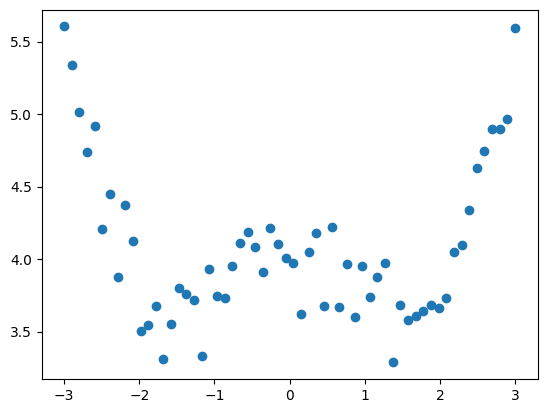

In [98]:
#fix the data and parameters
#increasing noise implifies the effect of overfitting
# use small n to see the effect of overfitting with ols
n=60
sig_noise=0.2
random_seed=90
npr.seed(random_seed)
x=np.linspace(-3,3,n).reshape(-1,1)
y=1+0.5*x*x+ 3*np.exp(-x*x/3)+npr.normal(0,sig_noise,x.shape)
#print(X.shape)
plt.scatter(x,y)

In [99]:
## define convenient regression functions
def reg(X_train,X_test,y_train,y_test,model):
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  mse_train=mean_squared_error(y_train,y_pred_train)
  mse_test=mean_squared_error(y_test,y_pred_test)
  if(hasattr(model,"coef_")):
    coef_norm=np.sum(np.abs(model.coef_))
  else:
    coef_norm=0
  return [mse_train,mse_test,coef_norm]
def normalize_data(X_train,X_test):
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train=scaler.transform(X_train)
  X_test=scaler.transform(X_test)
  return X_train,X_test,scaler

# Explore the regularization parameter's effect using a fixed feature matrix X
Note that for a large enough lambda, lasso test score sharply approach the
dummy model (because it sets all parameters to zero).
Ridge approaches the dummy model more smothly and at a larger lambda.

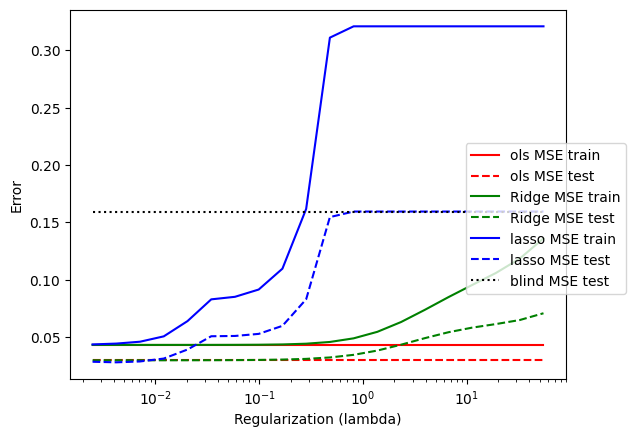

In [100]:

X=np.hstack((x,x*x,x**3,x**4))
n_lambda=20
lambda_range=np.exp(np.linspace(-6,4,n_lambda))
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=random_seed)
X_train,X_test,_=normalize_data(X_train,X_test)
ols_regression=reg(X_train,X_test,y_train,y_test,skl.LinearRegression())
ridge_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Ridge(lambd)) for lambd in lambda_range])
lasso_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Lasso(lambd)) for lambd in lambda_range])
blind=[mean_squared_error(y_train,[0]*len(y_train)),mean_squared_error(y_test,[0]*len(y_test))]
blind_regression=reg(X_train,X_test,y_train,y_test,DummyRegressor(strategy='mean'))

fig,ax=plt.subplots(1,1)
ax.plot(lambda_range,[ols_regression[0]]*n_lambda,label='ols MSE train',color='r')
ax.plot(lambda_range,[ols_regression[1]]*n_lambda,label='ols MSE test',color='r',linestyle='--')
ax.plot(lambda_range,ridge_regression[:,0],label='Ridge MSE train',color='green')
ax.plot(lambda_range,ridge_regression[:,1],label='Ridge MSE test',color='green',linestyle='--')
ax.plot(lambda_range,lasso_regression[:,0],label='lasso MSE train',color='blue')
ax.plot(lambda_range,lasso_regression[:,1],label='lasso MSE test',color='blue',linestyle='--')
#ax.plot(lambda_range,[blind[1]]*n_lambda,label='blind MSE',color='black',linestyle=':')
ax.plot(lambda_range,[blind_regression[1]]*n_lambda,label='blind MSE test',color='black',linestyle=':')
ax.set_xscale('log')
ax.set_xlabel('Regularization (lambda)')
ax.set_ylabel('Error')
fig.legend(loc='center right')

#Explore performance as a function of regularization  for different features complexity
As degree increases and approaches n, ols performance becomes worse
,while ridge and lasso are more stable

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e-03, tolerance: 1.540e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e-03, tolerance: 1.540e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e-03, tolerance: 1.540e

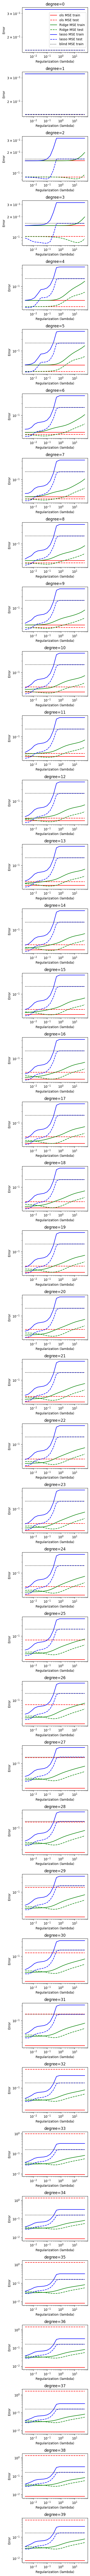

In [101]:

max_degree=40
fig,ax=plt.subplots(max_degree,1,figsize=(4,max_degree*4*0.7))

for degree in range(max_degree):
  poly=PolynomialFeatures(degree=degree)
  X=poly.fit_transform(x)
  n_lambda=20
  lambda_range=np.exp(np.linspace(-6,4,n_lambda))
  X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=random_seed)
  X_train,X_test,_=normalize_data(X_train,X_test)
  ols_regression=reg(X_train,X_test,y_train,y_test,skl.LinearRegression())
  ridge_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Ridge(lambd)) for lambd in lambda_range])
  lasso_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Lasso(lambd)) for lambd in lambda_range])
  blind=[mean_squared_error(y_train,[0]*len(y_train)),mean_squared_error(y_test,[0]*len(y_test))]
  blind_regression=reg(X_train,X_test,y_train,y_test,DummyRegressor(strategy='mean'))

  ax[degree].plot(lambda_range,[ols_regression[0]]*n_lambda,label='ols MSE train',color='r')
  ax[degree].plot(lambda_range,[ols_regression[1]]*n_lambda,label='ols MSE test',color='r',linestyle='--')
  ax[degree].plot(lambda_range,ridge_regression[:,0],label='Ridge MSE train',color='green')
  ax[degree].plot(lambda_range,ridge_regression[:,1],label='Ridge MSE test',color='green',linestyle='--')
  ax[degree].plot(lambda_range,lasso_regression[:,0],label='lasso MSE train',color='blue')
  ax[degree].plot(lambda_range,lasso_regression[:,1],label='lasso MSE test',color='blue',linestyle='--')
#ax.plot(lambda_range,[blind[1]]*n_lambda,label='blind MSE',color='black',linestyle=':')
  ax[degree].plot(lambda_range,[blind_regression[1]]*n_lambda,label='blind MSE train',color='black',linestyle=':')
  ax[degree].set_xscale('log')
  ax[degree].set_yscale('log')
  ax[degree].set_xlabel('Regularization (lambda)')
  ax[degree].set_ylabel('Error')
  ax[degree].set_title('degree={}'.format(degree))
ax[0].legend(loc='center right')
plt.tight_layout()

#Performance as a function of features complexity (max_degree) for a fixed regularization
As degree increases and approaches n, ols performance becomes worse,while ridge and lasso are more stable

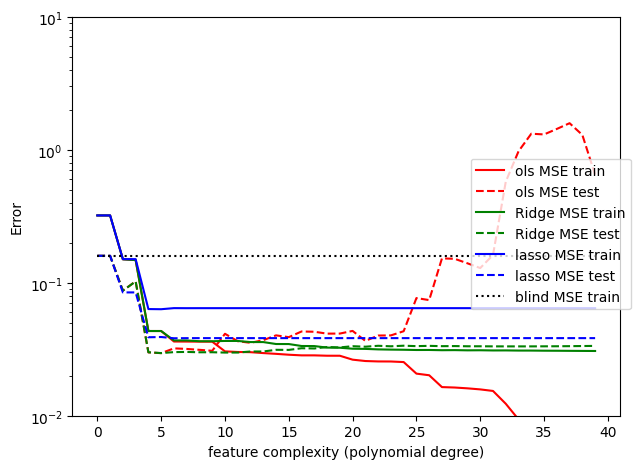

In [102]:

fig,ax=plt.subplots(1,1)
lambd=0.02
ols_regression=np.zeros((max_degree,3))
ridge_regression=np.zeros((max_degree,3))
lasso_regression=np.zeros((max_degree,3))
blind_regression=np.zeros((max_degree,3))
for degree in range(max_degree):
  poly=PolynomialFeatures(degree=degree)
  X=poly.fit_transform(x)
  n_lambda=20
  X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=random_seed)
  X_train,X_test,_=normalize_data(X_train,X_test)
  ols_regression[degree,:]=(np.array(reg(X_train,X_test,y_train,y_test,skl.LinearRegression())))
  ridge_regression[degree,:]=(np.array(reg(X_train,X_test,y_train,y_test,skl.Ridge(lambd))))
  lasso_regression[degree,:]=(np.array(reg(X_train,X_test,y_train,y_test,skl.Lasso(lambd))))
  blind_regression[degree,:]=(reg(X_train,X_test,y_train,y_test,DummyRegressor(strategy='mean')))

degree_range=np.arange(max_degree)
ax.plot(degree_range,ols_regression[:,0],label='ols MSE train',color='r')
ax.plot(degree_range,ols_regression[:,1],label='ols MSE test',color='r',linestyle='--')
ax.plot(degree_range,ridge_regression[:,0],label='Ridge MSE train',color='green')
ax.plot(degree_range,ridge_regression[:,1],label='Ridge MSE test',color='green',linestyle='--')
ax.plot(degree_range,lasso_regression[:,0],label='lasso MSE train',color='blue')
ax.plot(degree_range,lasso_regression[:,1],label='lasso MSE test',color='blue',linestyle='--')
#ax.plot(lambda_range,[blind[1]]*n_lambda,label='blind MSE',color='black',linestyle=':')
ax.plot(degree_range,blind_regression[:,1],label='blind MSE train',color='black',linestyle=':')
ax.set_yscale('log')
ax.set_xlabel('feature complexity (polynomial degree)')
ax.set_ylabel('Error')
ax.set_ylim(0.01,10**1)
fig.legend(loc='center right')
plt.tight_layout()

#boot strap
metric averaged over different samplings from the train set

n_bootstrap: 10


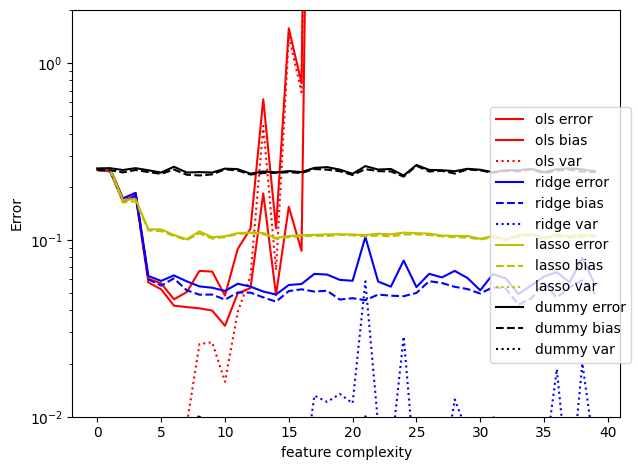

In [103]:

from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
def eval_bias_variance(y_test,y_pred):
  error=np.mean(np.mean((y_test-y_pred)**2,axis=1,keepdims=True))
  bias=np.mean( (y_test-np.mean(y_pred,axis=1,keepdims=True))**2)
  variance=np.mean( np.var(y_pred,axis=1,keepdims=True))
  return error,bias,variance
fig,ax=plt.subplots(1,1)
lambd=0.1
n_bootstrap=10
print("n_bootstrap:",n_bootstrap)
#initialize
error_ols=np.zeros(max_degree)
bias_ols=np.zeros(max_degree)
variance_ols=np.zeros(max_degree)
error_ridge=np.zeros(max_degree)
bias_ridge=np.zeros(max_degree)
variance_ridge=np.zeros(max_degree)
error_lasso=np.zeros(max_degree)
bias_lasso=np.zeros(max_degree)
variance_lasso=np.zeros(max_degree)
error_dummy=np.zeros(max_degree)
bias_dummy=np.zeros(max_degree)
variance_dummy=np.zeros(max_degree)
##
for degree in range(max_degree):
  y_pred_ols=np.zeros((len(y_test),n_bootstrap))
  y_pred_ridge=np.zeros((len(y_test),n_bootstrap))
  y_pred_lasso=np.zeros((len(y_test),n_bootstrap))
  y_pred_dummy=np.zeros((len(y_test),n_bootstrap))

  poly=PolynomialFeatures(degree=degree)
  model_ols=make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),skl.LinearRegression())
  model_ridge=make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),skl.Ridge(lambd))
  model_lasso=make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),skl.Lasso(lambd,max_iter=5000))
  model_dummy=make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),DummyRegressor(strategy='mean'))

  X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=random_seed+15)
  if(degree==10):
    x_plot=X_test.ravel()#np.linspace(-3,3,100)
    y_true=y_test.ravel()
    y_plot=model_ridge.fit(X_train,y_train).predict(x_plot[:,np.newaxis]).ravel()
    y_dummy_plot=model_dummy.fit(X_train,y_train).predict(x_plot[:,np.newaxis]).ravel()
  for i in range(n_bootstrap):
    x_,y_=resample(X_train,y_train)
    y_pred_ols[:,i]=model_ols.fit(x_,y_).predict(X_test).ravel()
    y_pred_ridge[:,i]=model_ridge.fit(x_,y_).predict(X_test).ravel()
    y_pred_lasso[:,i]=model_lasso.fit(x_,y_).predict(X_test).ravel()
    y_pred_dummy[:,i]=model_dummy.fit(x_,y_).predict(X_test).ravel()
  error_ols[degree],bias_ols[degree],variance_ols[degree]=eval_bias_variance(y_test,y_pred_ols)
  error_ridge[degree],bias_ridge[degree],variance_ridge[degree]=eval_bias_variance(y_test,y_pred_ridge)
  error_lasso[degree],bias_lasso[degree],variance_lasso[degree]=eval_bias_variance(y_test,y_pred_lasso)
  error_dummy[degree],bias_dummy[degree],variance_dummy[degree]=eval_bias_variance(y_test,y_pred_dummy)

degree_range=np.arange(max_degree)
ax.plot(degree_range,error_ols[:],label='ols error',color='r')
ax.plot(degree_range,bias_ols[:],label='ols bias',color='r',linestyle='-')
ax.plot(degree_range,variance_ols[:],label='ols var',color='r',linestyle=':')

ax.plot(degree_range,error_ridge[:],label='ridge error',color='b')
ax.plot(degree_range,bias_ridge[:],label='ridge bias',color='b',linestyle='--')
ax.plot(degree_range,variance_ridge[:],label='ridge var',color='b',linestyle=':')

ax.plot(degree_range,error_lasso[:],label='lasso error',color='y')
ax.plot(degree_range,bias_lasso[:],label='lasso bias',color='y',linestyle='--')
ax.plot(degree_range,variance_lasso[:],label='lasso var',color='y',linestyle=':')

ax.plot(degree_range,error_dummy[:],label='dummy error',color='k')
ax.plot(degree_range,bias_dummy[:],label='dummy bias',color='k',linestyle='--')
ax.plot(degree_range,variance_dummy[:],label='dummy var',color='k',linestyle=':')

ax.set_yscale('log')
ax.set_ylim(0.01,2)
ax.set_xlabel('feature complexity')
ax.set_ylabel('Error')
fig.legend(loc='center right')
plt.tight_layout()

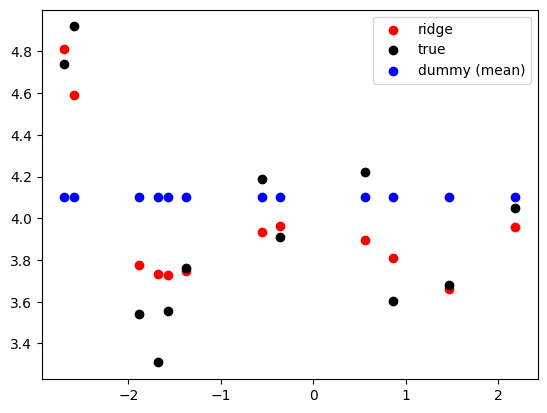

In [104]:
plt.scatter(x_plot,y_plot,color='r',label='ridge')
plt.scatter(x_plot,y_true,color='k',label='true')
plt.scatter(x_plot,y_dummy_plot,color='b',label='dummy (mean)')
plt.legend()

#illustrates the effect of multicollinearity and how Ridge and Lasso perform better

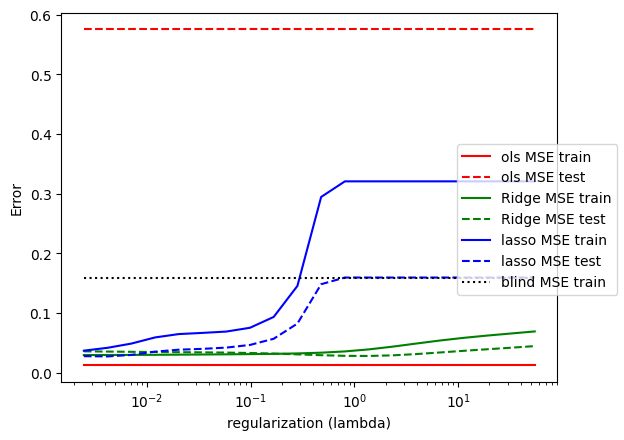

In [105]:

X=np.hstack((x,x*x))# the seed for the polynomial features makes it collinear!
poly=PolynomialFeatures(degree=16)
X=poly.fit_transform(X)
n_lambda=20
lambda_range=np.exp(np.linspace(-6,4,n_lambda))
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=random_seed)
X_train,X_test,_=normalize_data(X_train,X_test)
ols_regression=reg(X_train,X_test,y_train,y_test,skl.LinearRegression())
ridge_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Ridge(lambd)) for lambd in lambda_range])
lasso_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Lasso(lambd)) for lambd in lambda_range])
blind=[mean_squared_error(y_train,[0]*len(y_train)),mean_squared_error(y_test,[0]*len(y_test))]
blind_regression=reg(X_train,X_test,y_train,y_test,DummyRegressor(strategy='mean'))

fig,ax=plt.subplots(1,1)
ax.plot(lambda_range,[ols_regression[0]]*n_lambda,label='ols MSE train',color='r')
ax.plot(lambda_range,[ols_regression[1]]*n_lambda,label='ols MSE test',color='r',linestyle='--')
ax.plot(lambda_range,ridge_regression[:,0],label='Ridge MSE train',color='green')
ax.plot(lambda_range,ridge_regression[:,1],label='Ridge MSE test',color='green',linestyle='--')
ax.plot(lambda_range,lasso_regression[:,0],label='lasso MSE train',color='blue')
ax.plot(lambda_range,lasso_regression[:,1],label='lasso MSE test',color='blue',linestyle='--')
#ax.plot(lambda_range,[blind[1]]*n_lambda,label='blind MSE',color='black',linestyle=':')
ax.plot(lambda_range,[blind_regression[1]]*n_lambda,label='blind MSE train',color='black',linestyle=':')
ax.set_xscale('log')
ax.set_xlabel('regularization (lambda)')
ax.set_ylabel('Error')
fig.legend(loc='center right')

#Here I show that when you remove the noise, the effect of overfitting and multicolinearity is gone!

Notice that in this case, OLS perfoms better than ridge and lasso. This is because regularization leads to a bias in the parameters. The decrease in variance however, usually makes up for that. But with no noise,the variance doesn't affect predictions!

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e-03, tolerance: 1.695e-03
  model = cd_fast.enet_coordinate_descent(


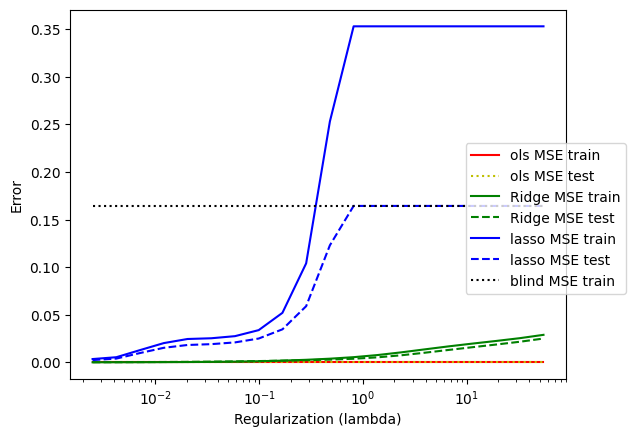

In [106]:


y_new=1+0.5*x*x+ 3*np.exp(-x*x/3)# no noise!
X=np.hstack((x,x*x))#same seed with collinearity!
poly=PolynomialFeatures(degree=16)
X=poly.fit_transform(X)
n_lambda=20
lambda_range=np.exp(np.linspace(-6,4,n_lambda))
X_train,X_test,y_train,y_test=train_test_split(X,y_new,train_size=0.8,random_state=random_seed)
X_train,X_test,_=normalize_data(X_train,X_test)
ols_regression=reg(X_train,X_test,y_train,y_test,skl.LinearRegression())
ridge_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Ridge(lambd)) for lambd in lambda_range])
lasso_regression=np.array([reg(X_train,X_test,y_train,y_test,skl.Lasso(lambd)) for lambd in lambda_range])
blind=[mean_squared_error(y_train,[0]*len(y_train)),mean_squared_error(y_test,[0]*len(y_test))]
blind_regression=reg(X_train,X_test,y_train,y_test,DummyRegressor(strategy='mean'))

fig,ax=plt.subplots(1,1)
ax.plot(lambda_range,[ols_regression[0]]*n_lambda,label='ols MSE train',color='r')
ax.plot(lambda_range,[ols_regression[1]]*n_lambda,label='ols MSE test',color='y',linestyle=':')
ax.plot(lambda_range,ridge_regression[:,0],label='Ridge MSE train',color='green')
ax.plot(lambda_range,ridge_regression[:,1],label='Ridge MSE test',color='green',linestyle='--')
ax.plot(lambda_range,lasso_regression[:,0],label='lasso MSE train',color='blue')
ax.plot(lambda_range,lasso_regression[:,1],label='lasso MSE test',color='blue',linestyle='--')
#ax.plot(lambda_range,[blind[1]]*n_lambda,label='blind MSE',color='black',linestyle=':')
ax.plot(lambda_range,[blind_regression[1]]*n_lambda,label='blind MSE train',color='black',linestyle=':')
ax.set_xscale('log')
ax.set_xlabel('Regularization (lambda)')
ax.set_ylabel('Error')
fig.legend(loc='center right')